In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, norm
from matplotlib.gridspec import GridSpec

In [2]:
2*bernoulli.rvs(p=0.5)-1

-1

In [3]:
GITHUB_REPO = "https://raw.githubusercontent.com/randall-romero/econometria/master/figures/"
DATAPATH = GITHUB_REPO if 'google.colab' in str(get_ipython()) else '../../figures/'

img = plt.imread(DATAPATH + "futbol.jpg")
jugador = 0

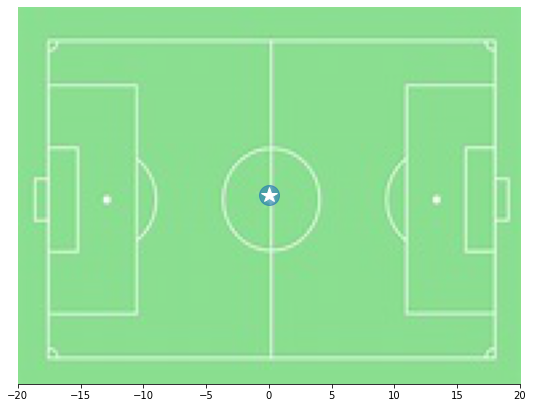

In [4]:
fig, ax = plt.subplots(figsize=[9, 7.5])
ax.imshow(img, extent=[-20, 20, 0, 30], alpha=0.5) # dibujar el campo de juego

ax.plot(jugador, 15, alpha=0.6, color='C0', marker='o', markersize=20) # dibujar al jugador
ax.plot(jugador, 15, color='white', marker='*', markersize=16)

for pos in ['left', 'right', 'top']:
    ax.spines[pos].set_visible(False)
    
ax.set(yticks=[]);

moneda = 2*bernoulli.rvs(p=0.5)-1  # lanzar la moneda al aire
jugador += moneda # cambiar de posición al jugador

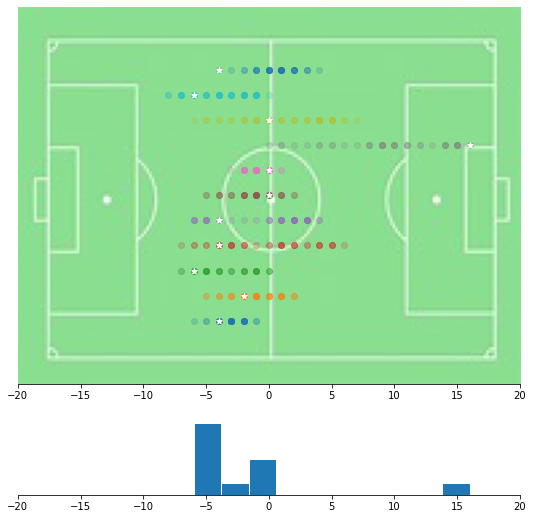

In [5]:
PASOS = 40

def recorrido(n=PASOS):
    pasos = 2*bernoulli.rvs(p=0.5, size=[n])-1
    return pasos.cumsum()

recorridos = np.array([recorrido() for _ in range(11)])
posición_final = recorridos[:,-1]


spec = GridSpec(ncols=1, nrows=2, hspace=0.15, height_ratios=[5, 1])

fig = plt.figure(figsize=[9, 9])
ax0 = fig.add_subplot(spec[0])

ax0.imshow(img, extent=[-20, 20, 0, 30], alpha=0.5)

for k, jugador in enumerate(recorridos):
    ax0.scatter(jugador, np.zeros(PASOS) + 5+2*k, alpha=0.2)
    ax0.scatter(posición_final[k], 5+2*k, color='white', marker='*')

ax1 = fig.add_subplot(spec[1], sharex=ax0)    
ax1.hist(posición_final, edgecolor='white', bins=10);


for pos in ['left', 'right', 'top']:
    ax0.spines[pos].set_visible(False)
    ax1.spines[pos].set_visible(False)
    
ax0.set(yticks=[])
ax1.set(yticks=[]);

Wall time: 1.43 s


"\n# Esta versión del gráfico sirve para hacer una animación\n\nbottom = np.zeros(nbins)\nfor zchunk in z.reshape([10, -1]):\n    yvals = np.histogram(zchunk, bins=xx, density=False)[0] / N / w\n    ax.bar(xx[:-1], yvals, bottom=bottom, color='C0', edgecolor='C0', align='edge', width=w)\n    bottom += yvals\n\n"

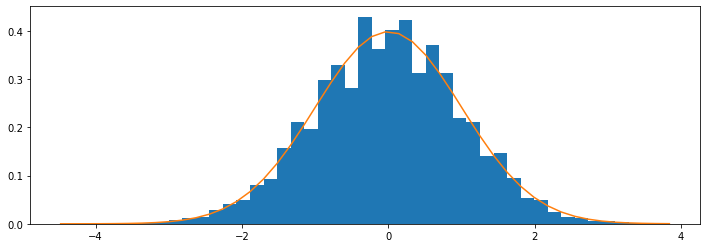

In [6]:
%%time
#np.random.seed(1492)
N, n = 10000, 2500
nbins = 45 # barras en el histograma

def posición_final():
    pasos = 2*bernoulli.rvs(p=0.5, size=[n])-1
    return pasos.sum()

posición = np.array([posición_final() for _ in range(N)])
z = posición/np.sqrt(n)

xx = np.linspace(z.min(),z.max(), nbins+1)
w = xx[1] - xx[0]

fig, ax = plt.subplots(figsize = [12,4])
plt.hist(posición/np.sqrt(n), bins=nbins, density=True);
plt.plot(xx, norm.pdf(xx), color='C1')

"""
# Esta versión del gráfico sirve para hacer una animación

bottom = np.zeros(nbins)
for zchunk in z.reshape([10, -1]):
    yvals = np.histogram(zchunk, bins=xx, density=False)[0] / N / w
    ax.bar(xx[:-1], yvals, bottom=bottom, color='C0', edgecolor='C0', align='edge', width=w)
    bottom += yvals

""";


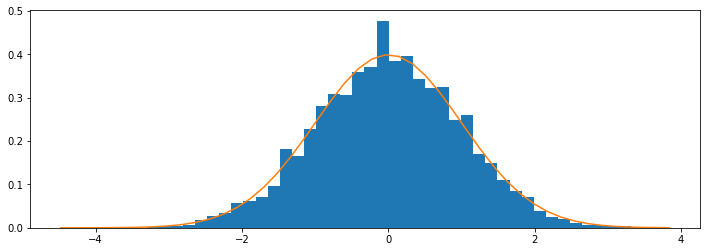

In [7]:
def posición_final():
    return 2*binom.rvs(p=0.5, n=n) - n

posición = np.array([posición_final() for _ in range(N)])


fig, ax = plt.subplots(figsize = [12,4])
plt.hist(posición/np.sqrt(n), bins=nbins, density=True);
plt.plot(xx, norm.pdf(xx), color='C1');